# **Prediccion de Ventas en un supermercado**

## **1.Abstract:**

El comercio tipo **retail** o también llamado ventas por menor es un tipo de comercio que se realiza en la actualidad por múltiples sectores de tiendas, uno de esos grupos son las tiendas de supermercados caracterizado por la gran cantidad de clientes finales. Actualmente a raíz del crecimiento de este tipo de comercio, y con la intención de mantenerse a la vanguardia, nuestra empresa que no es ajeno a este crecimiento desea implementar un plan para aumentar la inversión en el sector de envíos por tanto como finalidad desea hacer a posteriori un análisis prescriptivo de las ventas a través de envíos del supermercado.
El supermercado al cual representamos  solicito la labor al área de data science al cual usted pertenece, Encargarse de elaborar un modelo predictivo de ventas para por lo menos los próximos **7 días** basado en la información recopilada hasta la fecha en el archivo "Supermercado.csv" , para lo cual se elaborara bajo la metodología de trabajo tipo **CRISP-DM** el cual consiste en el entendimiento del negocio, entendimiento de la data ,posteriormente se realizó un **análisis exploratorio de datos (EDA)** y preparar la data para el modelo de regresión , y  después de realizar los **planteamientos de hipótesis** se  procede a hacer el modelamiento ,basado en nuestros objetivos a obtener se puede concluir que nuestro **modelo de aprendizaje supervisado de tipo regresión** ...





## **2.Introduccion:**



El comercio tipo retail o tambien llamado ventas por menor es un tipo de comercio que se realiza por multiples sectores de tiendas ,uno de esos grupos son las tiendas de supermercados caraterizado por la gran cantidad de clientes finales ,este actualmente en muchos paises  es uno de los sectores de mayor importancia y dinamismo en la economía de cualquier país.
Esto se debe no solo a los volúmenes de venta y lo que representa del **Producto Bruto Interno (PBI)**, sino también porque crea gran número de empleos y oportunidades es por ello que la empresa que se realizara el analisis se encuentra en este rubro.

El supermercado al cual representamos solicito la labor al area de data science al cual usted pertence, Encargarse de elaborar un modelo predictivo de ventas para por lo menos los proximos 7 dias basado en la informacion recopilada hasta la fecha en el archivo "Supermercado.csv" , para lo cual se elaborara bajo la metodologia de trabajo tipo CRISP-DM el cual consiste en el entendimiento del negocio,entendimiento de la data ,posteriormnete se realizo un analisis exploratorio de datos (EDA) y preparar la data para el modelo de regresion , y despues de realizar los planteamientos de hipotesis se procede a haecr el modelamiento ,basado en nuestros objetivos a obtener se puede concluir que nuestro modelo de aprendizaje supervisado de tipo regresion.


Contexto de Negocio :
Como miembro del equipo de Data Science de uno de los Supermercados de mayor renombre en el America del Norte con base en Estados Unidos ,se le solicito al equipo  basado en la informacion recopilada se realize un EDA y predigan las ventas de los proximos 7 dias desde la ultima fecha de venta.

Contexto analítico. Como parte del proyecto de Data Science se le entrego los los siguientes datos ya se han recopilado y están en completa disposcion de uso para su equipo:
El archivo "Supermercado.csv" contiene la informacion sobre las ventas realizadas.

El procedimiento que se tendra en cuenta constara de 5 etapas : (1) analizará los datos actuales averiguando la informacion que falta ; (2) investigar fuentes de complementarias; (3) extraer los datos de estas fuentes y realizar limpieza de datos, EDA e ingeniería de características; y finalmente (4)Realizar la comprobacion las hipotesis (5)   crear un modelo predictivo.

## **3.Cargando las Librerías Necesarias**

In [1]:
# importar liberías/bibliotecas
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import datetime as dt
drive.mount('/content/drive')
import statsmodels.api as sm #Proporciona herramientas estadísticas y modelos econométricos.
import plotly.express as px
from statsmodels.formula.api import ols #Proporciona funciones y métodos estadísticos.
import statsmodels
from scipy import stats #Proporciona funciones y métodos estadísticos.


Mounted at /content/drive


## 4.**Fase ETL**

### 4.1.Carga de Datos

In [2]:
url='/content/drive/MyDrive/2023/Proyecto CoderHouse/42400 Data Science/Entregable Data Science_Alister Vento Tapia/Prediccion de Ventas en un Supermercado/2do entregable Proyecto Final/Supermercado.csv'

Supermercado=pd.read_csv(url, parse_dates={'Order_Date': ['Order Date'], 'Ship_Date': ['Ship Date']}, index_col='Row ID',dayfirst=True)
Supermercado.head()

,Order_Date,Ship_Date,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,2017-11-08,2017-11-11,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,2017-11-08,2017-11-11,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,2017-06-12,2017-06-16,CA-2017-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,2016-10-11,2016-10-18,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,2016-10-11,2016-10-18,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
Supermercado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_Date     9800 non-null   datetime64[ns]
 1   Ship_Date      9800 non-null   datetime64[ns]
 2   Order ID       9800 non-null   object        
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

1.   Row ID:Codigo unico de ventas
2.   Order ID:Codigo de Orden
3.   Order Date:Fecha que se Realizo la Orden
4.   Ship Date :Fecha que se Realizo el Envio
5.   Ship Mode: Modo de Envio
6.   Customer ID :Codigo de Cliente
7.   Customer Name:Nombre del Cliente
8.   Segment :Segmentacion del Tipo de Venta
9.   Country: Pais del Cliente
10.  City:Ciudad del Cliente
11.  State:Estado del Cliente
12.  Postal Code:Codigo Postal del Cliente
13.  Region:Region del Cliente
14.  Product ID:Codigo de Producto
15.  Category:Categoria del Producto
16.  Sub-Category:Sub-Categoria del Producto
17.  Product Name:Nombre del Producto
18.  Sales:Valor de Venta

### 4.2.Análisis de Descriptivo de los Datos

#### 4.2.1.Definiremos funciones para el analisis descriptivo de los datos

In [4]:
def check_df(dataset, head = 5):
    print('*'*30 + 'Forma de la base de datos' + '*'*30, end = '\n'*2)
    print(dataset.shape, end = '\n'*2)
    print('*'*30 + 'Informacion general de la base de datos' + '*'*30, end = '\n'*2)
    print(dataset.info(), end = '\n'*2)
    print('*'*30 + 'Mostrar las primeras 5 filas' + '*'*30, end = '\n'*2)
    print(dataset.head(), end = '\n'*2)
    print('*'*30 + 'NaN cantidad de nulos' + '*'*30, end = '\n'*2)
    print(dataset.isnull().sum(), end = '\n'*2)
    print('*'*30 + 'Analisis estadistico' + '*'*30, end = '\n'*2)
    print(dataset.describe().T, end = '\n'*2)
    print('*'*30 + 'Principales quantiles de la base de datos' + '*'*30, end ='\n'*2)
    print(dataset.describe([0, 0.25, 0.50,0.75,1]).T, end = '\n'*2)

In [5]:
def values_df(dataset, head = 5):
    print('*'*30 + 'Cantidad de valores Unicos por Columna' + '*'*30, end = '\n'*2)
    print(dataset.nunique(), end = '\n'*2)
    print('*'*30 + 'Valores Unicos por Columna' + '*'*30, end = '\n'*2)
    for elemento in df.columns:
      if df[elemento].nunique() < 50:
        print(elemento, end = '\n'*2)
        print(df[elemento].unique(), end = '\n'*2)
        print('*'*60)

#### 4.2.2Aplicando las funciones para revisar los datos

In [6]:
# Se procedera a generar una copia de nuestra base de datos para trabajar con ella y posteriormente a generar nuestra hipotesis
df=Supermercado.copy()
df.head()

,Order_Date,Ship_Date,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,2017-11-08,2017-11-11,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,2017-11-08,2017-11-11,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,2017-06-12,2017-06-16,CA-2017-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,2016-10-11,2016-10-18,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,2016-10-11,2016-10-18,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
check_df(df)

******************************Forma de la base de datos******************************

(9800, 17)

******************************Informacion general de la base de datos******************************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_Date     9800 non-null   datetime64[ns]
 1   Ship_Date      9800 non-null   datetime64[ns]
 2   Order ID       9800 non-null   object        
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-n

In [8]:
values_df(df)

******************************Cantidad de valores Unicos por Columna******************************

Order_Date       1230
Ship_Date        1326
Order ID         4922
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

******************************Valores Unicos por Columna******************************

Ship Mode

['Second Class' 'Standard Class' 'First Class' 'Same Day']

************************************************************
Segment

['Consumer' 'Corporate' 'Home Office']

************************************************************
Country

['United States']

************************************************************
State

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 

### 4.3.Fase de ETL

In [9]:
df.head()

,Order_Date,Ship_Date,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,2017-11-08,2017-11-11,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,2017-11-08,2017-11-11,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,2017-06-12,2017-06-16,CA-2017-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,2016-10-11,2016-10-18,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,2016-10-11,2016-10-18,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_Date     9800 non-null   datetime64[ns]
 1   Ship_Date      9800 non-null   datetime64[ns]
 2   Order ID       9800 non-null   object        
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [11]:
# Verificamos los datos faltantes en postal code
df[df['Postal Code'].isna()].index

Int64Index([2235, 5275, 8799, 9147, 9148, 9149, 9387, 9388, 9389, 9390, 9742], dtype='int64', name='Row ID')

In [12]:
#Revisaremos los datos faltantes
df.iloc[[2234, 5274, 8798, 9146, 9147, 9148, 9386, 9387, 9388, 9389, 9741],:]

,Order_Date,Ship_Date,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
2235,2018-12-05,2018-12-10,CA-2018-104066,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5275,2016-11-07,2016-11-09,CA-2016-162887,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8799,2017-04-06,2017-04-10,US-2017-150140,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9147,2017-01-23,2017-01-27,US-2017-165505,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9148,2017-01-23,2017-01-27,US-2017-165505,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9149,2017-01-23,2017-01-27,US-2017-165505,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9387,2018-01-19,2018-01-23,US-2018-127292,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9388,2018-01-19,2018-01-23,US-2018-127292,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9389,2018-01-19,2018-01-23,US-2018-127292,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94


Se observa que los datos faltantes corresponden al postal code de la ciudad de burlington :

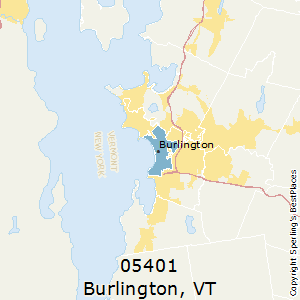

donde escogeremos un zipcode para nuestro modelo, en este caso 05401

In [13]:
# Fill missing values with a specific value (e.g., 9999)
df['Postal Code'].fillna('05401', inplace=True)
df['Postal Code']=df['Postal Code'].astype('str')

In [14]:
#Revisamos que la imputacion se realize correctamente
df.iloc[[2234, 5274, 8798, 9146, 9147, 9148, 9386, 9387, 9388, 9389, 9741],:]

,Order_Date,Ship_Date,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
2235,2018-12-05,2018-12-10,CA-2018-104066,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,05401,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5275,2016-11-07,2016-11-09,CA-2016-162887,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,05401,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8799,2017-04-06,2017-04-10,US-2017-150140,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,05401,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9147,2017-01-23,2017-01-27,US-2017-165505,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9148,2017-01-23,2017-01-27,US-2017-165505,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9149,2017-01-23,2017-01-27,US-2017-165505,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9387,2018-01-19,2018-01-23,US-2018-127292,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9388,2018-01-19,2018-01-23,US-2018-127292,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9389,2018-01-19,2018-01-23,US-2018-127292,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94


In [15]:
# Al presentar unicamente un valor en la columna country se elimina
df.drop(columns=['Country'], inplace=True)

In [16]:
df.head()

,Order_Date,Ship_Date,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,
1,2017-11-08,2017-11-11,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,2017-11-08,2017-11-11,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,2017-06-12,2017-06-16,CA-2017-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,2016-10-11,2016-10-18,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,2016-10-11,2016-10-18,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Para la elaboración de nuestro modelo de machine learning usaremos un **modelo tipo supervisado de regresión**, la razón de esto es porque nuestro objetivo es **predecir las ventas de los próximos 7 días** desde la última fecha de venta, para la elaboración usaremos una serie de pasos estándar que se desarrollaran a continuación

## **5. Análisis de Datos Exploratorios (EDA)**

Tras el apogeo y lo diversos sucesos en la ultima decada el sector de e-commerce empezo a obtener ese **boost** que necesitaba para marcar una presencia y pasar de ser un canal secundario a ser considerado un canal primario el cual significa una ventaja competitiva en el mercado en la constante en el dominio del mercado ,esta es una de las razones que me llamo la atencion y me motivo a querer saber mas no solamente basado en mi perspectiva si no agregando el plus y tener una base fundamentada en datos,para esta ocasion decidi tomar a una empresa que tiene como **hub** en los Estados Unidos uno de los paises con las mayores empresas que se encuentran en el **TOP 10** en el sector de e-commerce y comercion retail.

Para comenzar con el analisis se planteo algunas preguntas iniciales con el
**Preguntas Preliminares:**
- ¿Cual es la distribucion de las ventas a traves del tiempo ?
- ¿Cual es la categoria que genera mayores ingresos?
- ¿Cual es la subcategoria que genera mayores ingresos?
- ¿Cual es el segmento que genera mayores ingresos?
- ¿Cual es la region que genera mayores ingresos?
- ¿Respecto a los clientes ,realizaron unicamente una compra o compraron mas de una vez?
-¿Existe una relacion entre el tiempo de envio y el volumen de ventas?
- ¿cual es la relacion de nuestras variables?

Tras resolver estas preguntas realizaremos un análisis exploratorio de datos para entender la distribución, las estadísticas y las relaciones entre las variables. Esto nos ayudará a tomar decisiones informadas sobre la selección de características y la cantidad de clústeres.

In [17]:
drop_columnas=['Customer ID','Customer Name','Postal Code']
df_EDA=df.drop(drop_columnas,axis=1).copy()

In [18]:
df_EDA.head()

,Order_Date,Ship_Date,Order ID,Ship Mode,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,
1,2017-11-08,2017-11-11,CA-2017-152156,Second Class,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,2017-11-08,2017-11-11,CA-2017-152156,Second Class,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,2017-06-12,2017-06-16,CA-2017-138688,Second Class,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,2016-10-11,2016-10-18,US-2016-108966,Standard Class,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,2016-10-11,2016-10-18,US-2016-108966,Standard Class,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


###**¿Cual es la distribucion de las ventas ?**


In [19]:
df_EDA.head()

,Order_Date,Ship_Date,Order ID,Ship Mode,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,
1,2017-11-08,2017-11-11,CA-2017-152156,Second Class,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,2017-11-08,2017-11-11,CA-2017-152156,Second Class,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,2017-06-12,2017-06-16,CA-2017-138688,Second Class,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,2016-10-11,2016-10-18,US-2016-108966,Standard Class,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,2016-10-11,2016-10-18,US-2016-108966,Standard Class,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Primero tratareamos de tener una vista global de las ventas haciendo un grafico de dispersion

In [20]:
fig = px.scatter(df_EDA
, x="Order_Date", y="Sales", color="Category", title="Relación la fecha y las ventas")
fig.show()

Ahora procederemos a hacer un grafico de linea viendo la evolucion de las ventas de manera diaria separandolo por categorias

In [21]:
df_EDA['Order Date_Numeric']=df_EDA['Order_Date'].map(dt.datetime.toordinal)

In [22]:
resumen_diario=df_EDA.groupby(by=[df_EDA['Order Date_Numeric'],df_EDA['Category']], as_index=False).sum().round(2).sort_values(by = 'Order Date_Numeric', ascending = True)
resumen_diario.head().style.background_gradient(cmap='Reds', subset = ['Sales'])

<ipython-input-22-5ee191c50f6e>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Order Date_Numeric,Category,Sales
0,735601,Office Supplies,16.450000
1,735602,Office Supplies,288.060000
2,735603,Office Supplies,19.540000
3,735604,Furniture,2573.820000
4,735604,Office Supplies,685.340000


In [23]:
resumen_diario['Fecha'] = resumen_diario['Order Date_Numeric'].apply(dt.datetime.fromordinal)

In [24]:
resumen_diario['Fecha']

0      2015-01-03
1      2015-01-04
2      2015-01-05
3      2015-01-06
4      2015-01-06
          ...    
2833   2018-12-29
2835   2018-12-29
2837   2018-12-30
2836   2018-12-30
2838   2018-12-30
Name: Fecha, Length: 2839, dtype: datetime64[ns]

In [25]:
fig = px.scatter(resumen_diario
, x='Fecha', y='Sales', color='Category', title="Relación la fecha y las ventas")
fig.show()

Finalmente tendremos una vista agrupandolo por años

In [26]:
dict = {
                        'Sales': ['sum','count','mean','min','max' ],
                    }
resumen_anual=df_EDA.groupby(df_EDA['Order_Date'].dt.year).agg(dict).round(2).sort_values(by = 'Order_Date', ascending = True)
resumen_anual.style.background_gradient(cmap='Reds', subset = ['Sales'])

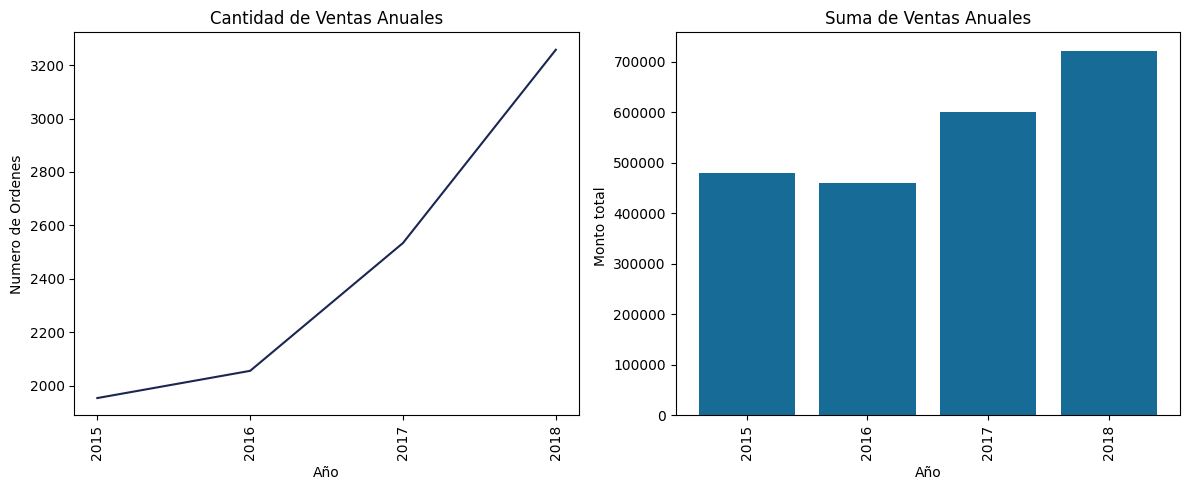

In [27]:
resumen_anual_reset = resumen_anual.reset_index()
#Crear una figura y dos subplots en una sola fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graficar cantidad ventas anuales
ax1.plot(resumen_anual_reset.index,resumen_anual_reset[('Sales','count')],label=resumen_anual_reset.index, color='#1b2651')
ax1.set_xticks(resumen_anual_reset.index)
ax1.set_xticklabels([2015, 2016, 2017, 2018], rotation='vertical')
ax1.set_xlabel('Año')
ax1.set_ylabel('Numero de Ordenes')
ax1.set_title('Cantidad de Ventas Anuales')


# Graficar suma de ventas anuales
ax2.bar(resumen_anual_reset.index, resumen_anual_reset[('Sales','sum')],label=resumen_anual_reset.index, color='#166c96')
ax2.set_xticks(resumen_anual_reset.index)
ax2.set_xticklabels([2015, 2016, 2017, 2018], rotation='vertical')
ax2.set_xlabel('Año')
ax2.set_ylabel('Monto total ')
ax2.set_title('Suma de Ventas Anuales')

plt.tight_layout()
plt.show()

**Conclusion**
En los graficos se concluye que en el año 2018 es muestro punto maximo de cantidad y valor total de ventas anuales

### **¿Cual es la categoria que genera mayores ingresos?**

In [28]:
dict = {
                        'Sales': ['count','min','max','sum','mean', ],
                    }
df.groupby('Category',as_index=False).agg(dict).round(2).style.background_gradient(cmap='Reds', subset = ['Sales'])


Se extrae de la tabla que la categoria Tecnologia posee la mayor cantidad de suma de ventas total  y el mayor promedio de ventas entre los 3 ,sin embargo tambien notamos que posee el menor numero de cantidad de ventas .

Como analisis adicional revisaremos la evolucion anual de cada categoria

In [29]:
df_EDA['Year'] = df_EDA['Order_Date'].dt.year


In [30]:
categoria_año=df_EDA[['Year','Category','Sales']].groupby(['Year','Category'],as_index=False).sum().round(2)
categoria_año

,Year,Category,Sales
0,2015,Furniture,156477.88
1,2015,Office Supplies,149512.82
2,2015,Technology,173865.51
3,2016,Furniture,164053.87
4,2016,Office Supplies,133124.41
5,2016,Technology,162257.73
6,2017,Furniture,195813.04
7,2017,Office Supplies,182417.57
8,2017,Technology,221961.94
9,2018,Furniture,212313.79


In [31]:
fig=px.line(categoria_año, x='Year', y='Sales', color='Category', title="Relación la fecha y las ventas")
fig.show()

### **¿Cual es la subcategoria que genera mayores ingresos?**

In [32]:
df_subcategoria=df_EDA.groupby(['Category','Sub-Category'],as_index=False).agg((dict)).round(2).sort_values(by = [('Sales','sum')], ascending = False).reset_index(drop=True)
df_subcategoria.head(10).style.background_gradient(cmap='Reds', subset = [('Sales','sum')])

Se observa en la tabla top 10 sub-categorias cada categoria destaca con alguna subcategoria respectivamente Technology-Phones,Furniture-Chairs,Office Supplies-Storage donde el principal ingreso para la empresa vendria ser la empresa

Agregar Grafico

---



### **¿Cual es el segmento que genera mayores ingresos?**

In [33]:
df_subcategoria=df_EDA.groupby(['Segment','Category'],as_index=False).agg((dict)).round(2).sort_values(by = [('Sales','sum')], ascending = False).reset_index(drop=True)
df_subcategoria.style.background_gradient(cmap='Reds', subset = [('Sales','sum')])

En esta tabla vemos la supremacia en el sector al consumidor el cual es el primero en las 3 categorias que distribuye nuestro e-commerce

Text(0.5, 1.0, 'Clientes Segun Segmento ')

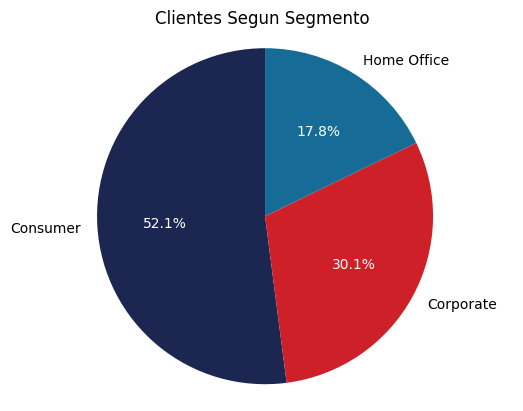

In [34]:
# Agrupar los valores y ordenando de menor a mayor
cant_segment=df['Order ID'].groupby(df['Segment']).count()
segment=df['Segment'].unique()
colores = ["#1b2651", "#cd2028", "#166c96"]
sorted_cant_segment, sorted_segment = zip(*sorted(zip(cant_segment,segment), reverse=True))

# Crear el gráfico de pie
fig, piechart_3 = plt.subplots()
_, _, autopcts=piechart_3.pie(sorted_cant_segment, labels=sorted_segment, autopct='%1.1f%%', colors=colores,  startangle=90,textprops={'color': 'black'},pctdistance=0.6, labeldistance=1.1)
for autopct in autopcts:
    autopct.set_color('white')
# Ajustar el aspecto del gráfico, Para que el gráfico de pie sea circular y no se deforme
piechart_3.axis('equal')

# Agregar título
piechart_3.set_title('Clientes Segun Segmento ')


In [35]:
#Se define una funcion para colocar la etiqueta
def valores(axs, space=.01):
    def _single(ax):
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() - (p.get_height()*0.6)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

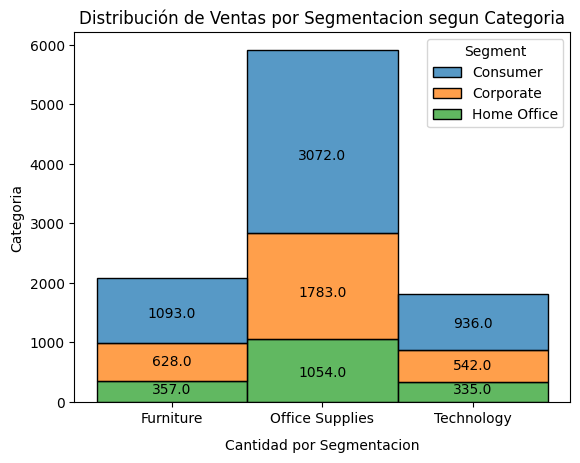

In [36]:
plt.figure()
ax =sns.histplot(data=df, x="Category", hue="Segment", multiple="stack")
colores = ["#1b2651", "#cd2028", "#166c96"]

ax.set(xlabel='Cantidad por Segmentacion', ylabel='Categoria', title='Distribución de Ventas por Segmentacion segun Categoria')
ax.xaxis.set_label_coords(0.5, -0.1)
valores(ax)
plt.show()

**Conclusion**
Del grafico nos da a entender que la categoria mas vendida son los articulo de oficina es decir 'Office Supplies' el cual es consumido en su mayoria por personas naturales es decir 'Consumer'

**Conclusion**:
Se muestra que el mayor segmento de ventas es el segmento 'Consumer' que con mas de la mitad

### **¿Cual es la region que genera mayores ingresos?**

Para elaborar este mapa usaremos el API de kaggle para traer los datos de un json almacenado el cual contiene la informacion geometrica de los estados amercanos , en este link [Datos de los estados americanos](https://www.kaggle.com/datasets/rehanguha/usa-states/data)

In [37]:
!pip install kaggle
import os
import folium

In [38]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!chmod 600 /content/kaggle.json


In [39]:
!kaggle datasets download -d rehanguha/usa-states
!unzip usa-states.zip

  0% 0.00/28.6k [00:00<?, ?B/s]
100% 28.6k/28.6k [00:00<00:00, 54.7MB/s]
Archive:  usa-states.zip
  inflating: usa-states.json         


In [40]:
dict = {
                        'Sales': ['count','min','max','mean','sum' ],
                    }
df_map=df_EDA[['State','Sales']].groupby('State',as_index=False).agg(dict).round(2)
df_map=df_map.sort_values(by = [('Sales','sum')], ascending = False).reset_index(drop=True)
df_map.head(10).style.background_gradient(cmap='Reds', subset = [('Sales','sum')])

In [41]:
state_sale = pd.DataFrame(df['State'].value_counts())[0:10]

<Axes: xlabel='State'>

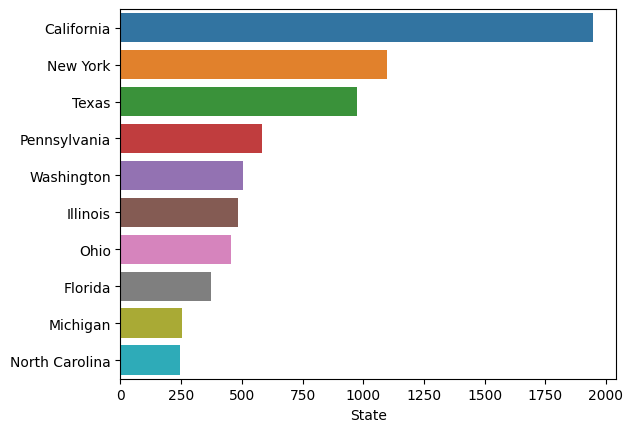

In [42]:
sns.barplot(state_sale , y= state_sale.index , x = 'State')

In [43]:
bins = list(df_map[('Sales','sum')].quantile([0, 0.5, 0.75, 0.90,0.95, 1]))
bins

[919.91, 22205.15, 48219.11, 94004.55400000008, 155226.2579999998, 446306.46]

In [44]:
state_geo = '/content/usa-states.json'

bins = list(df_map[('Sales','sum')].quantile([0, 0.5, 0.75, 0.90, 1]))

map3 = folium.Map(location=[37, -102], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=df_map,
    columns=[('State',''),('Sales', 'sum')],
    key_on='properties.name',
    fill_color= 'YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Ingresos',
    bins = bins,
    reset = True

).add_to(map3)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],style=style_function, labels=False)
)

map3

### **¿Respecto a los clientes ,realizaron unicamente una compra o compraron mas de una vez?**

In [45]:
df_clientes = df['Order ID'].value_counts()
clientes = pd.DataFrame(df_clientes)
once = clientes[clientes['Order ID'] == 1].count()
repeat = clientes[clientes['Order ID'] > 1].count()
df_cant_clientes=pd.concat([once,repeat],ignore_index=True).head()
df_cant_clientes.index=['Compro Una Vez','Compro Varias Veces']
colors = ["#166c96", "#cd2028" ]
df_cant_clientes

Compro Una Vez         2499
Compro Varias Veces    2423
dtype: int64

<Axes: title={'center': 'Tipos de clientes segun la frecuencia de compra '}, xlabel='Tipos de clientes', ylabel='Cantidad'>

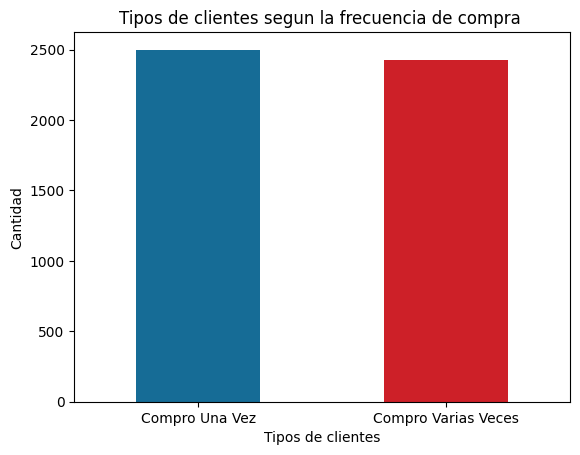

In [46]:
df_cant_clientes.plot(kind='bar',
            color=colors,
            title='Tipos de clientes segun la frecuencia de compra ',
            xlabel='Tipos de clientes',
            ylabel='Cantidad',
            rot=0)


**Conclusion** :Se concluye que casi la mitad de los clientes son clientes frecuentes

**Conclusion** :Se concluye que nuestro mayor volumen de ventas se dirigen al estado de California

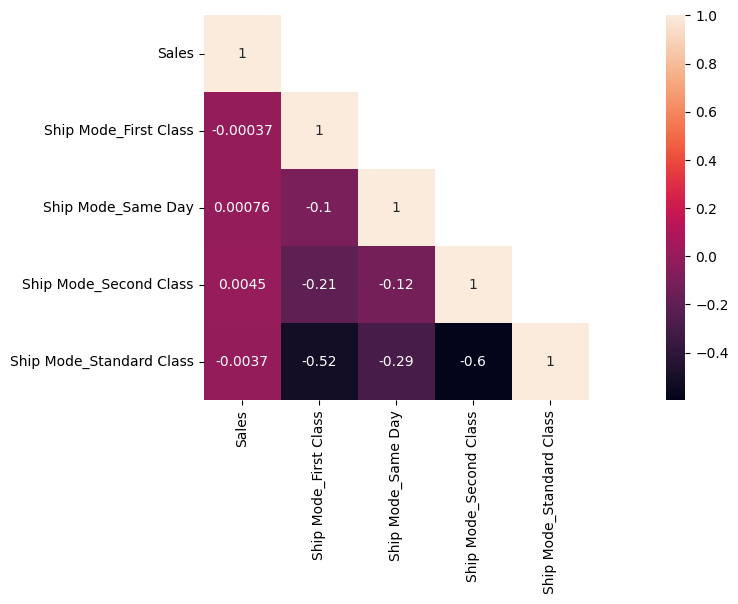

In [47]:
df1 = df[['Ship Mode','Sales']]
dfcor = pd.get_dummies(df1)
mat_corr = dfcor.corr()
mask = np.array(mat_corr)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = mat_corr, mask = mask,square = True, annot = True, cbar = True);

**Conclusion** :
Se concluye que los envios tipo standard disminuye a medida que aumenta los envios tipo primera y segunda clase

### **¿Existe una relacion entre el tiempo de envio y el volumen de ventas?**





In [48]:
#Definimos una funcion para hallar el tiempo de envio
def timedelta_to_int(row):


    time_difference =row['Ship_Date']- row['Order_Date']
    return int(time_difference.days)

In [49]:
# Apply the function to create a new column with integer time differences
df_EDA['Tiempo de envio'] = df_EDA.apply(timedelta_to_int, axis=1)

In [50]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order_Date          9800 non-null   datetime64[ns]
 1   Ship_Date           9800 non-null   datetime64[ns]
 2   Order ID            9800 non-null   object        
 3   Ship Mode           9800 non-null   object        
 4   Segment             9800 non-null   object        
 5   City                9800 non-null   object        
 6   State               9800 non-null   object        
 7   Region              9800 non-null   object        
 8   Product ID          9800 non-null   object        
 9   Category            9800 non-null   object        
 10  Sub-Category        9800 non-null   object        
 11  Product Name        9800 non-null   object        
 12  Sales               9800 non-null   float64       
 13  Order Date_Numeric  9800 non-null   int64       

In [51]:
df_EDA.head()

,Order_Date,Ship_Date,Order ID,Ship Mode,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date_Numeric,Year,Tiempo de envio
Row ID,,,,,,,,,,,,,,,,
1,2017-11-08,2017-11-11,CA-2017-152156,Second Class,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,736641,2017,3
2,2017-11-08,2017-11-11,CA-2017-152156,Second Class,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,736641,2017,3
3,2017-06-12,2017-06-16,CA-2017-138688,Second Class,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,736492,2017,4
4,2016-10-11,2016-10-18,US-2016-108966,Standard Class,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,736248,2016,7
5,2016-10-11,2016-10-18,US-2016-108966,Standard Class,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,736248,2016,7


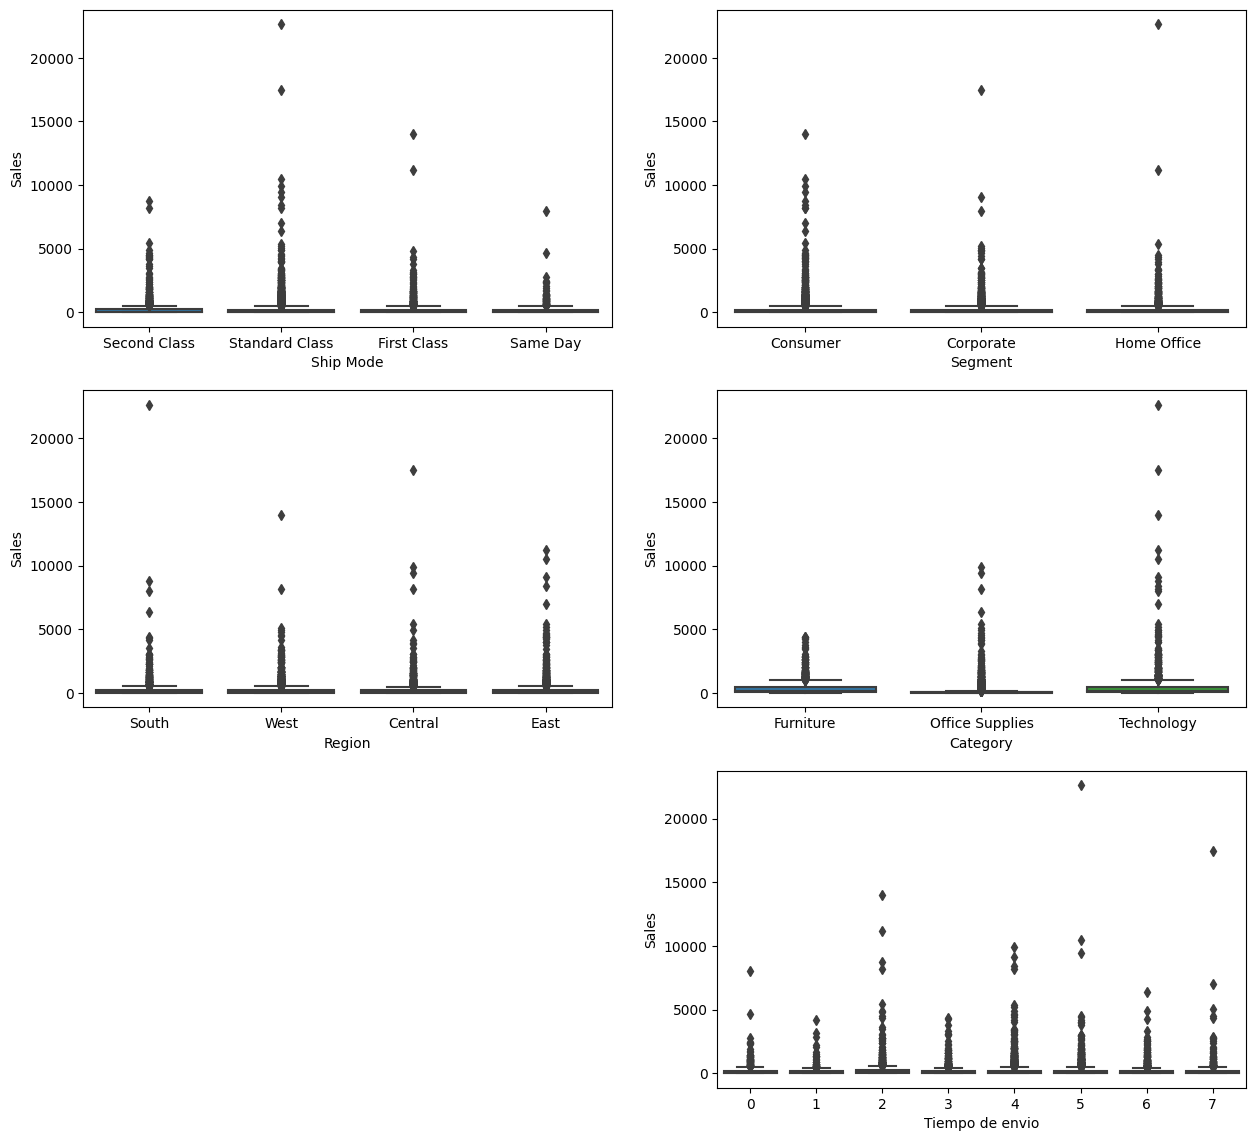

In [52]:
# Dropearemos las columnas que no nos ayuden en el calculo

l=[x for x in df_EDA.columns if x in ['Ship Mode', 'Segment', 'Region', 'Category', 'Sales', 'Tiempo de envio']]

#Definir figura
plt.figure(figsize=(15,14))

#Bucle con iterables
for x,column in zip(range(6), df_EDA[l]):
  if column !='Sales' : # Esto se hace para evitar que se realice un gráfico de caja para la columna 'Sales' en sí misma.
    #print(x)
    if x<=5:
      plt.subplot(3,2,x+1)
      sns.boxplot(data=df_EDA[l], x=column, y=df_EDA[l]['Sales'])

In [53]:
df_analisis=df_EDA[l].copy()

In [54]:
df_analisis

,Ship Mode,Segment,Region,Category,Sales,Tiempo de envio
Row ID,,,,,,
1,Second Class,Consumer,South,Furniture,261.9600,3
2,Second Class,Consumer,South,Furniture,731.9400,3
3,Second Class,Corporate,West,Office Supplies,14.6200,4
4,Standard Class,Consumer,South,Furniture,957.5775,7
5,Standard Class,Consumer,South,Office Supplies,22.3680,7
...,...,...,...,...,...,...
9796,Standard Class,Corporate,Central,Office Supplies,3.7980,7
9797,Standard Class,Corporate,East,Office Supplies,10.3680,5
9798,Standard Class,Corporate,East,Technology,235.1880,5


In [55]:
df_analisis[(df_analisis['Tiempo de envio']>=1)&(df_analisis['Ship Mode']=='Same Day')]

,Ship Mode,Segment,Region,Category,Sales,Tiempo de envio
Row ID,,,,,,
1474,Same Day,Consumer,Central,Furniture,6.688,1
2349,Same Day,Corporate,West,Office Supplies,9.024,1
2350,Same Day,Corporate,West,Office Supplies,69.456,1
2351,Same Day,Corporate,West,Office Supplies,10.860,1
2352,Same Day,Corporate,West,Office Supplies,79.470,1
2353,Same Day,Corporate,West,Office Supplies,10.080,1
3042,Same Day,Home Office,West,Office Supplies,12.960,1
3043,Same Day,Home Office,West,Office Supplies,22.180,1
3044,Same Day,Home Office,West,Furniture,2054.272,1


Observamos que existen envios que se realizan con maxima prioridad que deberian llegar ese mismo dia sin embargo llegan al dia siguiente

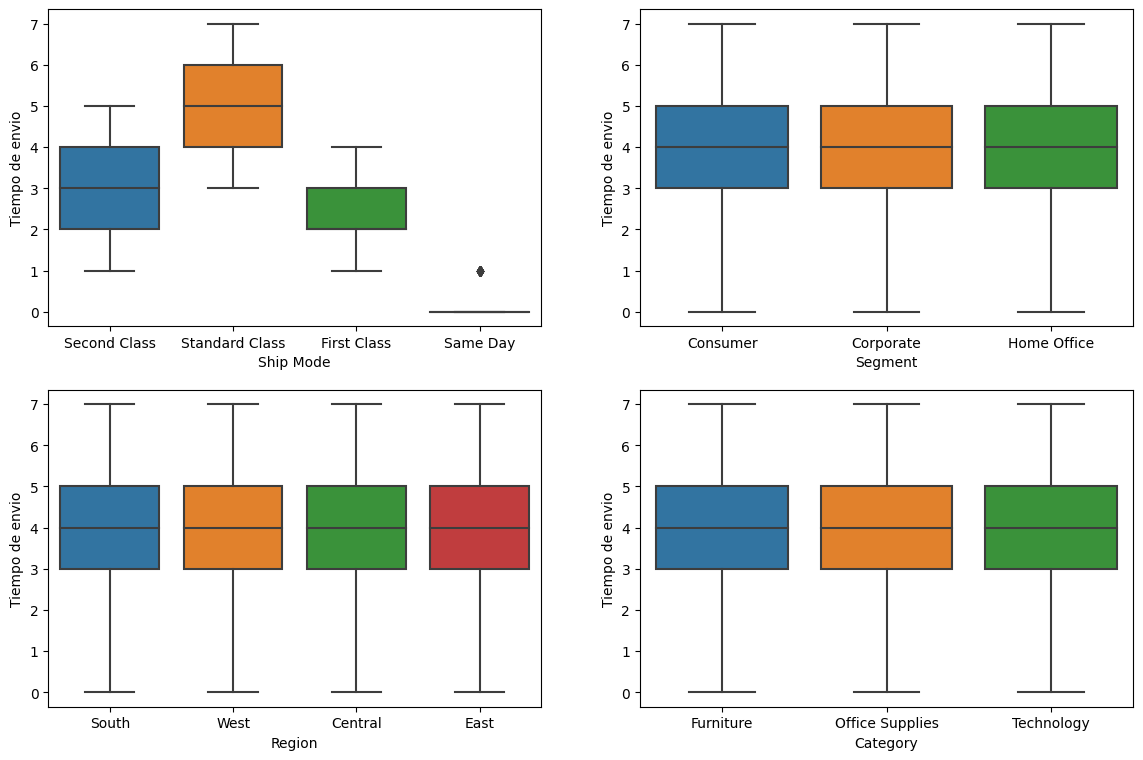

In [56]:
#Definir figura
plt.figure(figsize=(14,14))
#Bucle con iterables
for x,column in zip(range(6), df_analisis):
  if (column !='Tiempo de envio') & (column !='Sales') : # Esto se hace para evitar que se realice un gráfico de caja para la columna 'Sales' en sí misma.
    #print(x)
    if x<=5:
      plt.subplot(3,2,x+1)
      sns.boxplot(data=df_analisis, x=column, y=df_analisis['Tiempo de envio'])

In [57]:
df_EDA.head()

,Order_Date,Ship_Date,Order ID,Ship Mode,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date_Numeric,Year,Tiempo de envio
Row ID,,,,,,,,,,,,,,,,
1,2017-11-08,2017-11-11,CA-2017-152156,Second Class,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,736641,2017,3
2,2017-11-08,2017-11-11,CA-2017-152156,Second Class,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,736641,2017,3
3,2017-06-12,2017-06-16,CA-2017-138688,Second Class,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,736492,2017,4
4,2016-10-11,2016-10-18,US-2016-108966,Standard Class,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,736248,2016,7
5,2016-10-11,2016-10-18,US-2016-108966,Standard Class,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,736248,2016,7


In [58]:
state_ETA=df_EDA[['State','Tiempo de envio']].groupby('State').mean().sort_values(by='Tiempo de envio', ascending=False)
state_ETA.head(10).style.background_gradient(cmap='Reds', subset = ['Tiempo de envio'])

,Tiempo de envio
State,
District of Columbia,5.700000
Wyoming,5.000000
Maine,5.000000
Iowa,4.730769
Montana,4.600000
New Mexico,4.513514
Oklahoma,4.484848
Minnesota,4.483146
New Jersey,4.459016


**Conclusion** :
- Se concluye que para el estado de columbia es donde se presenta el mayor tiempo de envio

Ahora haremos un analisis mas exhaustivo y lo separaremos por tipo de envio

In [59]:
state_ETA=df_EDA[['State','Tiempo de envio','Ship Mode']].groupby(['State','Ship Mode']).mean().round(2).unstack().sort_values(by=[('Tiempo de envio','Standard Class'),('Tiempo de envio','Second Class'),('Tiempo de envio','First Class'),('Tiempo de envio','Same Day')], ascending=True)
state_ETA.style.background_gradient(cmap='Reds', subset = [('Tiempo de envio','Standard Class'),('Tiempo de envio','Second Class'),('Tiempo de envio','First Class'),('Tiempo de envio','Same Day')])

**Conclusion** :
Se concluye que para el estado de columbia es donde se presenta el mayor tiempo de envio

In [60]:
state_ETA

Tiempo de envio                                     
Ship Mode                First Class Same Day Second Class Standard Class
State                                                                    
West Virginia                    NaN     0.00          NaN           4.00
Vermont                          NaN      NaN         2.00           4.10
Louisiana                       1.30     0.00         3.07           4.60
Idaho                           2.25      NaN         2.00           4.62
New Hampshire                   1.00      NaN         2.91           4.71
Pennsylvania                    2.20     0.00         3.21           4.71
Nebraska                        1.71     0.00         2.67           4.77
Massachusetts                   2.50     0.00         3.17           4.78
Mississippi                     3.00     0.00         3.71           4.82
Missouri                        1.75     0.00         4.29           4.82
Wisconsin                       2.17     0.00         3.00           4.84
Kansas                          3.00     0.00         2.00           4.87
New Mexico                      1.00     0.00         4.33           4.88
Ohio                            2.35     0.00         2.99           4.89
South Dakota                    3.00      NaN         3.00           4.89
Virginia                        2.16     0.00         3.19           4.89
Texas                           2.27     0.08         3.08           4.90
Colorado                        2.18     0.33         2.67           4.92
Georgia                         2.10     0.00         2.87           4.97
Illinois                        2.45     0.00         3.82           4.97
California                      2.09     0.09         3.16           4.99
North Dakota                     NaN      NaN         2.00           5.00
Tennessee                       2.59     0.00         3.00           5.00
Maine                            NaN      NaN          NaN           5.00
Wyoming                          NaN      NaN          NaN           5.00
North Carolina                  2.05     0.07         3.24           5.01
Maryland                        2.33     0.00         3.50           5.02
Kentucky                        2.23     0.00         3.15           5.03
South Carolina                  2.67     0.00         3.44           5.06
New York                        2.13     0.00         3.57           5.08
Montana                         3.00     0.00          NaN           5.08
Florida                         2.06     0.00         3.26           5.09
Indiana                         2.38     0.00         3.57           5.10
Minnesota                       2.50     0.00         4.38           5.11
Alabama                         2.78     0.00         3.17           5.12
Michigan                        2.33     0.00         2.77           5.13
New Jersey                      2.44     0.00         2.83           5.16
Connecticut                     2.16     0.00         3.36           5.17
Washington                      2.22     0.13         3.12           5.19
Arkansas                        1.20     0.00         3.80           5.21
Oregon                          2.33      NaN         2.47           5.25
Delaware                        2.39     0.00         2.69           5.28
Utah                            1.75     0.00         4.00           5.29
Arizona                         1.83     0.06         3.59           5.30
Oklahoma                        2.00     0.00         4.14           5.47
Rhode Island                    1.94      NaN         2.71           5.50
Iowa                            1.00     0.00         3.83           5.50
Nevada                          1.80     0.00         3.58           5.67
District of Columbia             NaN      NaN         5.00           6.00

In [61]:
dict = {
                        'Sales': ['count','min','max','mean','median','sum' ],
                    }
state_venta_prom=df_EDA[['State','Sales']].groupby('State').agg(dict).round(2).sort_values(by=[('Sales','sum')], ascending=False)
state_venta_prom.head(10).style.background_gradient(cmap='Reds', subset = [('Sales','sum')])


**Conclusion** :
Se concluye que los envios tipo standard disminuye a medida que aumenta los envios tipo primera y segunda clase

### **¿Cuál es la relacion entre nuestras variables?**

In [62]:
df_corr=df_EDA[['Ship Mode','Segment','State','Region','Category','Sub-Category','Sales','Order Date_Numeric','Year','Tiempo de envio']].copy()

In [63]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Codificar variables categóricas
label_encoder = LabelEncoder()

df_corr['Ship Mode_Encoded'] = label_encoder.fit_transform(df['Ship Mode'])
df_corr['Segment_Encoded'] = label_encoder.fit_transform(df['Segment'])
df_corr['State_Encoded'] = label_encoder.fit_transform(df['State'])
df_corr['Region_Encoded'] = label_encoder.fit_transform(df['Region'])
df_corr['Category_Encoded'] = label_encoder.fit_transform(df['Category'])
df_corr['Sub-Category_Encoded'] = label_encoder.fit_transform(df['Sub-Category'])
StdS_corr = StandardScaler()
df_corr['Sales_Standardized'] = StdS_corr.fit_transform(df_corr[['Sales']])


df_corr.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Order Date_Numeric,Year,Tiempo de envio,Ship Mode_Encoded,Segment_Encoded,State_Encoded,Region_Encoded,Category_Encoded,Sub-Category_Encoded,Sales_Standardized
Row ID,,,,,,,,,,,,,,,,,
1,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,736641,2017,3,2,0,15,2,0,4,0.049776
2,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,736641,2017,3,2,0,15,2,0,5,0.799801
3,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,736492,2017,4,2,1,3,3,1,10,-0.344944
4,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,736248,2016,7,3,0,8,2,0,16,1.159887
5,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,736248,2016,7,3,0,8,2,1,14,-0.332580


In [64]:
df_corr_reg=df_corr[['Order Date_Numeric','Year','Tiempo de envio','Ship Mode_Encoded','Segment_Encoded','State_Encoded','Region_Encoded','Category_Encoded','Sub-Category_Encoded','Sales_Standardized']]
df_corr_reg.head()

,Order Date_Numeric,Year,Tiempo de envio,Ship Mode_Encoded,Segment_Encoded,State_Encoded,Region_Encoded,Category_Encoded,Sub-Category_Encoded,Sales_Standardized
Row ID,,,,,,,,,,
1,736641,2017,3,2,0,15,2,0,4,0.049776
2,736641,2017,3,2,0,15,2,0,5,0.799801
3,736492,2017,4,2,1,3,3,1,10,-0.344944
4,736248,2016,7,3,0,8,2,0,16,1.159887
5,736248,2016,7,3,0,8,2,1,14,-0.332580


In [65]:
df_corr_reg.columns=['Fecha numerica','Año','Tiempo de envio','Modo de envío','Segmento','Estado','Región','Categoría','Subcategoría','Ventas']

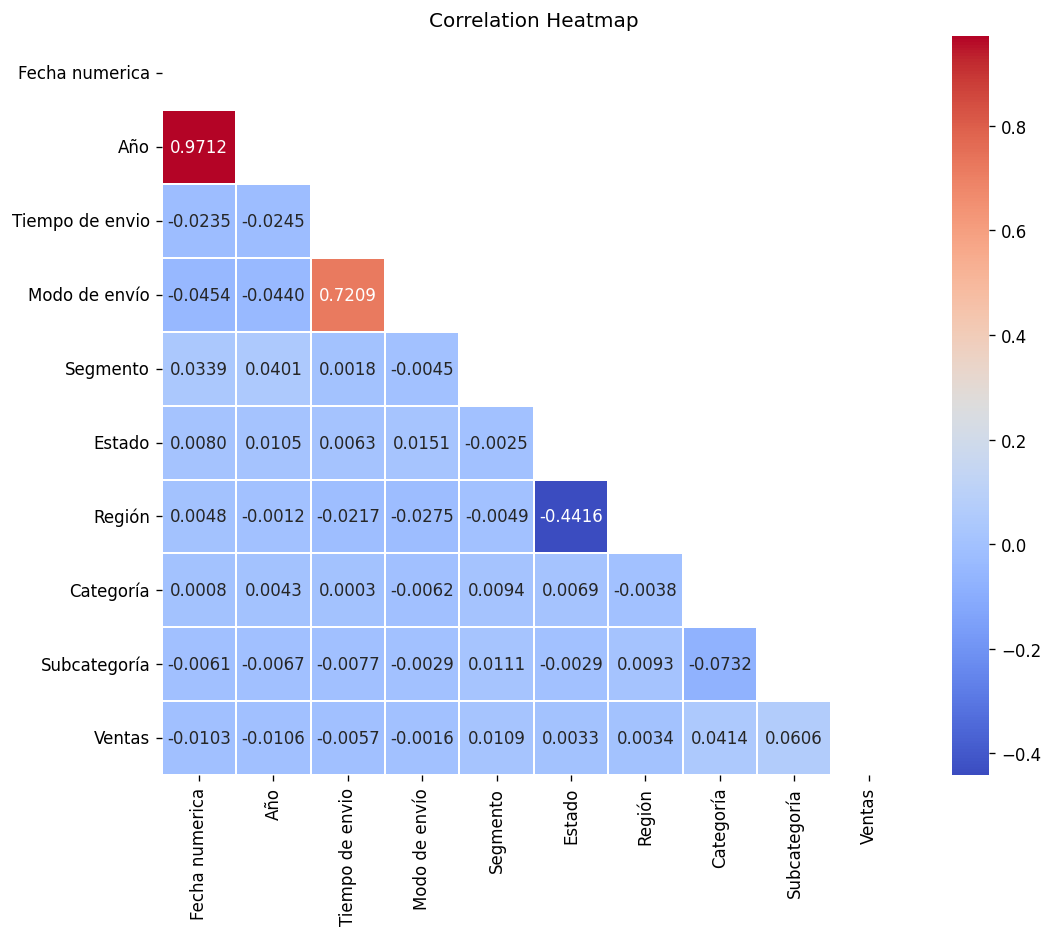

In [66]:
#Aplicar máscara al gráfico de matriz de correlación

plt.figure(dpi = 120,figsize= (10,8))

#Delimitamos la máscara

mascara = np.triu(np.ones_like(df_corr_reg.corr(),dtype = bool))

sns.heatmap(df_corr_reg.corr(),mask = mascara, fmt = ".4f",annot=True,lw=1,cmap = 'coolwarm')

plt.yticks(rotation = 0)

plt.xticks(rotation = 90)

plt.title('Correlation Heatmap')

plt.show()

**Conclusion** :
Se concluye que las variables año y Order Date_Numeric ,Tiempo de envio y Ship Mode_Encoded ,State_Encoded y Region_Encoded son las variables mas correlacionadas.

## 6.Presentacion de Hipotesis

##### Hipotesis 1 :¿Segun los resultados observados el sector **Home Office** genera mayor ganancia compra/envio?

In [67]:
#Analisamos el promedio de ventas por segmento
Segmento_venta_sum=df_EDA[['Segment','Sales']].groupby('Segment').mean().sort_values(by='Sales', ascending=False)
Segmento_venta_sum.head(10)

,Sales
Segment,
Home Office,243.403309
Corporate,233.150720
Consumer,225.065777


<Axes: xlabel='Segment', ylabel='Sales'>

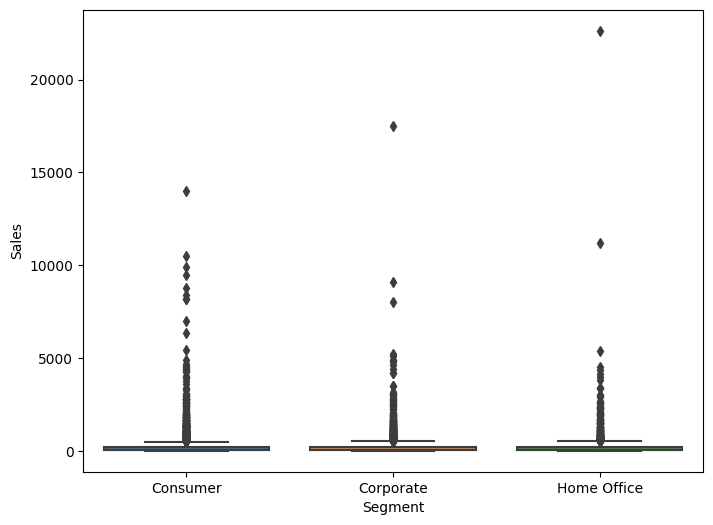

In [68]:
#Definir figura
plt.figure(figsize=(8,6))
#Generando grafica de bigotes
sns.boxplot(data=df_EDA[l], x=df_EDA['Segment'], y=df_EDA[l]['Sales'])

In [69]:
Home=df_EDA[df_EDA['Segment']=='Home Office'].Sales
Corporate=df_EDA[df_EDA['Segment']=='Corporate'].Sales
Consumer=df_EDA[df_EDA['Segment']=='Consumer'].Sales

In [70]:
#Prueba T
#Tomamos como la media de east como nuestro H0=233.15 y nuestro Ha=243.40
stats.ttest_1samp(Home, popmean=233.15)

TtestResult(statistic=0.5616165276653375, pvalue=0.574449437038068, df=1745)

In [71]:
T,p = stats.ttest_1samp(Home, popmean=233.15)
p_value = p/2
p_value

0.287224718519034

**Conclusion** :Segun los resultados observados el sector **Home Office** genera mayor venta/envio que Corporate

##### Hipotesis 2 :¿Segun los resultados observados realmente los resultados por segmentos son diferentes?

In [72]:
Home=df_EDA[df_EDA['Segment']=='Home Office'].Sales
Corporate=df_EDA[df_EDA['Segment']=='Corporate'].Sales
Consumer=df_EDA[df_EDA['Segment']=='Consumer'].Sales

In [73]:
statistic, pvalue = stats.ttest_ind(Home,Corporate, equal_var=False)
print('Estadistico:',round(statistic,2),'p-valor:', round(pvalue,2))

Estadistico: 0.48 p-valor: 0.63


In [74]:
statistic, pvalue = stats.ttest_ind(Home,Consumer, equal_var=False)
print('Estadistico:',round(statistic,2),'p-valor:', round(pvalue,2))

Estadistico: 0.92 p-valor: 0.36


In [75]:
statistic, pvalue = stats.ttest_ind(Corporate,Consumer, equal_var=False)
print('Estadistico:',round(statistic,2),'p-valor:', round(pvalue,2))

Estadistico: 0.59 p-valor: 0.56


**Conclusion** :Segun los resultados observados no se posee suficiente informacion para negar la hipotesis puesto que el valor de p>=0.05 por lo tanto se puede considerar que las diferencias entre nuestros conjuntos es indiferente

##### **Hipotesis 3** :¿Segun los resultados observados la region **South** genera mayor ganancia compra/envio que la region **East**?

In [76]:
Region_Sales=df_EDA[['Region','Sales']].groupby('Region').mean().sort_values(by='Sales', ascending=False)
Region_Sales.head(10)

,Sales
Region,
South,243.524067
East,240.401697
West,226.184613
Central,216.357889


<Axes: xlabel='Region', ylabel='Sales'>

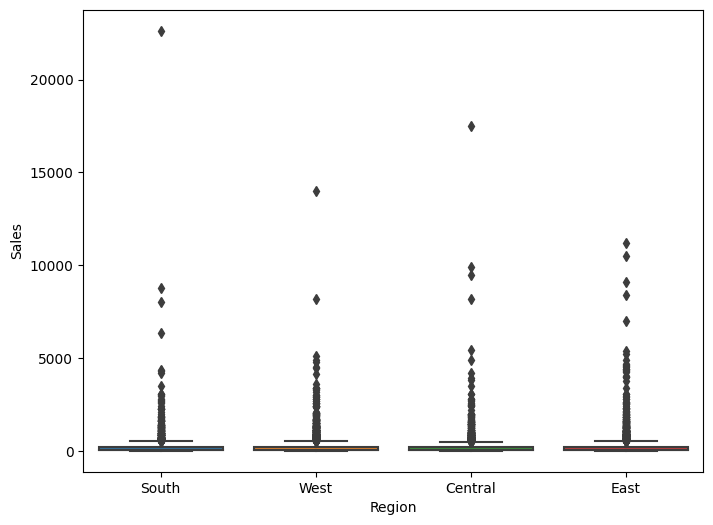

In [77]:
#Definir figura
plt.figure(figsize=(8,6))
#Generando grafica de bigotes
sns.boxplot(data=df_EDA[l], x=df_EDA['Region'], y=df_EDA[l]['Sales'])

In [78]:
sur=df[df['Region']=='South'].Sales
este=df[df['Region']=='East'].Sales
oeste=df[df['Region']=='West'].Sales


In [79]:
#Prueba T
#Tomamos como la media de east como nuestro H0=240.40 y nuestro Ha=243.52
stats.ttest_1samp(sur, popmean=240.40)

TtestResult(statistic=0.16013908369552893, pvalue=0.872791766016433, df=1597)

In [80]:
T,p = stats.ttest_1samp(sur, popmean=240.40)
p_value = p/2
p_value

0.4363958830082165

**Conclusion** :Segun los resultados observados no se posee suficiente informacion para negar la hipotesis puesto que el valor de p>=0.05 por lo tanto se puede considerar que las diferencias entre nuestros conjuntos es indiferente

##### Hipotesis 4 :¿Segun la informacion cual es el metodo de envio mas rentable segun segmentacion  para el supermercado**?

Basado en la informacion recogida  de la hipotesis 1 nuestro segmento mas rentable seria Home Office al momento que se aplico la hipotesis se concluye esta afirmacion

In [81]:
#Filtrando al data de Home Office
HomeOffice_Sales=df_EDA[df_EDA['Segment']=='Home Office']
Ship_HomeOffice_Sales=HomeOffice_Sales[['Ship Mode','Sales']].groupby(['Ship Mode']).sum().sort_values(by='Sales', ascending=False)
Ship_HomeOffice_Sales

,Sales
Ship Mode,
Standard Class,236706.1245
First Class,84887.2564
Second Class,80743.3530
Same Day,22645.4430


In [82]:
Ship_HomeOffice_mean=HomeOffice_Sales[['Ship Mode','Sales']].groupby(['Ship Mode']).mean().sort_values(by='Sales', ascending=False)
Ship_HomeOffice_mean

,Sales
Ship Mode,
First Class,305.349843
Second Class,260.462429
Standard Class,226.296486
Same Day,202.191455


In [83]:
#De las tablas anterior se observa que el mayor volumen de ventas  se da en standra Class y el mayor promedio de ventas lo tiene First class
#Analizamos el promedio de ventas por segmento
HomeOffice_First=df_EDA[(df_EDA['Ship Mode']=='First Class')&(df_EDA['Segment']=='Home Office')].Sales
HomeOffice_Standard=df_EDA[(df_EDA['Ship Mode']=='Standard Class')&(df_EDA['Segment']=='Home Office')].Sales

In [84]:
#Prueba T
#Tomamos como la media de Standard Class como nuestro H0=226.29 y nuestro Ha=305.349
stats.ttest_1samp(HomeOffice_First, popmean=226.29)

TtestResult(statistic=1.4722389976217358, pvalue=0.1420916090518917, df=277)

In [85]:
T,p = stats.ttest_1samp(HomeOffice_First, popmean=226.29)
p_value = p/2
p_value

0.07104580452594585

Al obtener un p_value=0.07 el cual claramente es mayor a 0.05 sin embargo al poseer un valor tan proximo nos podria llevar a concluir que se acercó al límite de significancia (p=0.07)

De la informacion obtenida podemos deducir que nuestras principales estados-clientes son California,New York,Texas,Washington y Pensilvania en ese respectivo orden en la suma de compras.  